In [1]:
## Getting MNIST data 
import matplotlib.pyplot as plt
from six.moves import urllib
import seaborn as sns

from sklearn.decomposition import PCA
from scipy.io import loadmat

import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
inp=np.loadtxt('inp_alfalfa.txt')  # load the input
tar=np.loadtxt('tar_alfalfa.txt')  # load the target

print ('Done!')

Done!


In [3]:
## Splitting the data into two sets: train and test (95%) because t_SNE is slow!


from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( inp, tar, test_size=.5, random_state=0)

In [4]:
print (np.shape(train_img),np.shape(test_img))

(6837, 15) (6837, 15)


In [5]:
# normalization
scaler_S= StandardScaler().fit(train_img)  
train_img= scaler_S.transform(train_img) 
test_img= scaler_S.transform(test_img) 

In [6]:
 ##Choose the percentage or the first components of PCA

#pca = PCA(.95)

n_components=15

pca=PCA(n_components=n_components, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
pca.fit(train_img)
train_img_pca = pca.transform(train_img)
test_img_pca = pca.transform(test_img)



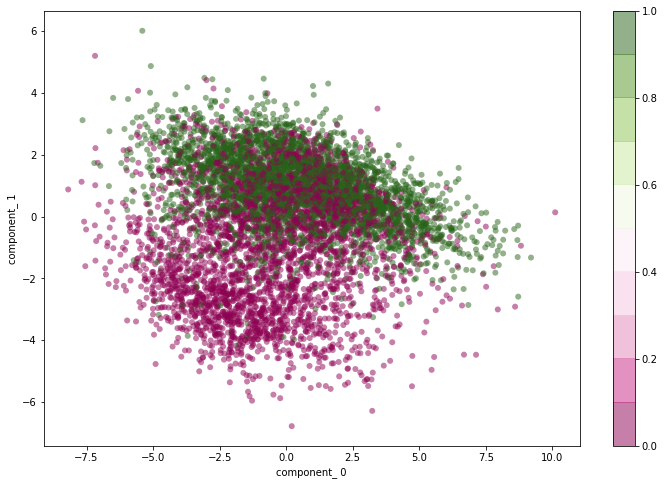

In [7]:
##  see the distribution of the examples on the some selected components

comX=0
comY=1



plt.figure(figsize=(12,8))
plt.scatter(test_img_pca[:,comX], test_img_pca[:,comY],
            c=test_lbl, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('PiYG',10))
plt.xlabel('component_ '+ str(comX))
plt.ylabel('component_ '+str(comY))
plt.colorbar();



In [8]:
## Run t_SNE (with  dimensions=2 i.e., a new 2-d space) 

import time

from sklearn.manifold import TSNE



time_start = time.time()
tsne = TSNE(n_components=3)#, verbose=1, perplexity=40, n_iter=300)
tsne.fit(train_img)



# tsne_results = tsne.fit_transform(.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Done')

t-SNE done! Time elapsed: 35.50036263465881 seconds
Done


In [9]:
tsne_results_tr= tsne.fit_transform(train_img)


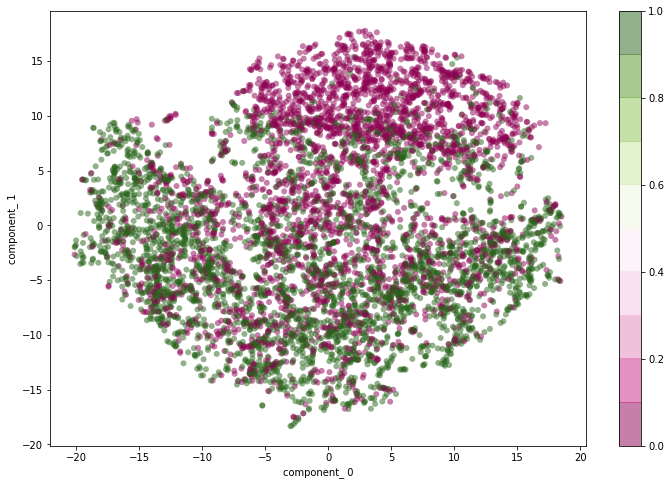

In [10]:
## see the examples on the selected 2-dim space 

comX=0
comY=1



plt.figure(figsize=(12,8))
plt.scatter(tsne_results_tr[:,comX], tsne_results_tr[:,comY],
            c=train_lbl, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('PiYG',10))
plt.xlabel('component_ '+ str(comX))
plt.ylabel('component_ '+str(comY))
plt.colorbar();





